In [22]:
import numpy as np

# load dataset
labels = np.load("dataset/sprite_labels_nc_1788_16x16.npy")
data = np.load("dataset/sprites_1788_16x16.npy")

In [23]:
len(labels)

89400

In [24]:
len(data)

89400

In [25]:
import torch
from torch.utils.data import TensorDataset, DataLoader

images_tensor = torch.tensor(data)
labels_tensor = torch.tensor(labels)

dataset = TensorDataset(images_tensor, labels_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [29]:
# dataset[i] returns (image, label)
image, label = dataset[0]

# sample data
print(image.shape)  # shape of the first image
print(label)        # label of the first sample

torch.Size([16, 16, 3])
tensor([1., 0., 0., 0., 0.], dtype=torch.float64)


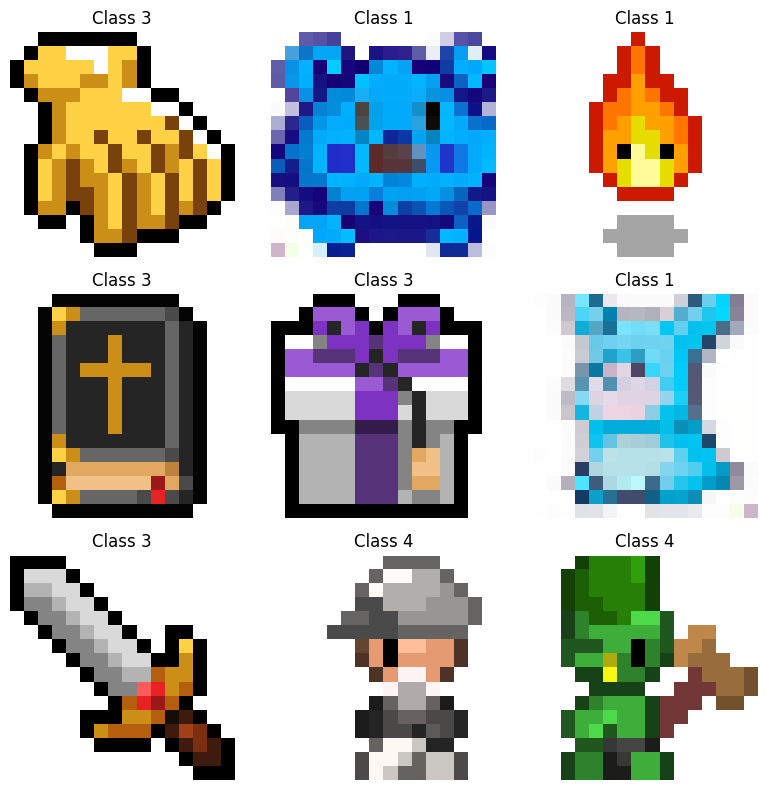

In [ ]:
import matplotlib.pyplot as plt
import torch

# Map class index to name
labels_map = {
    0: "Class 0",
    1: "Class 1",
    2: "Class 2",
    3: "Class 3",
    4: "Class 4",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):

    # pick a random sample
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    
    # Convert one-hot to index
    label_idx = label.argmax().item()
    
    # Add subplot
    ax = figure.add_subplot(rows, cols, i)
    ax.set_title(labels_map[label_idx])
    ax.axis("off")
    
    # Plot the image in the subplot
    ax.imshow(img.numpy())

plt.tight_layout()
plt.show()
